In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,4)

In [72]:
df = pd.read_csv("./Balasore District Treasury Data2016-17.csv")

In [73]:
df.shape

(13650, 11)

In [74]:
df["Expenditure Percentage"] = ( df["Expenditure"]/df["Alloted Amount"]) * 100

In [75]:
df.head()

,DDO Code,DDO Name,Budget Code,Allotment Serial No,Allotment Date,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance,Expenditure Percentage
0,BLSAGR001,District Agriculture Officer Jaleswar,23-2401-00-001-1159-01003-136-0-1-0,1,16-Apr-16,102,32000,32000,0,0,0,100.0
1,BLSAGR001,District Agriculture Officer Jaleswar,23-2401-00-001-1159-01003-156-0-1-0,2,16-Apr-16,103,43200,43200,0,0,0,100.0
2,BLSAGR001,District Agriculture Officer Jaleswar,23-2401-00-001-1159-01003-403-0-1-0,3,16-Apr-16,104,1920,1920,0,0,0,100.0
3,BLSAGR001,District Agriculture Officer Jaleswar,23-2401-00-001-1159-01003-516-0-1-0,4,16-Apr-16,105,224,224,0,0,0,100.0
4,BLSAGR001,District Agriculture Officer Jaleswar,23-2401-00-001-1159-06001-000-0-1-0,5,16-Apr-16,106,850,850,0,0,0,100.0


In [76]:
df.columns

Index([u'DDO Code', u'DDO Name', u'Budget Code', u'Allotment Serial No',
       u'Allotment Date', u'Allotment ID', u'Alloted Amount', u'Expenditure',
       u'Surrender/Withdrwal', u'Deduct Amount', u'Balance',
       u'Expenditure Percentage'],
      dtype='object')

In [77]:
df.dtypes

DDO Code                   object
DDO Name                   object
Budget Code                object
Allotment Serial No         int64
Allotment Date             object
Allotment ID                int64
Alloted Amount              int64
Expenditure                 int64
Surrender/Withdrwal         int64
Deduct Amount               int64
Balance                     int64
Expenditure Percentage    float64
dtype: object

In [78]:
df[df.columns].apply(pd.Series.nunique)

DDO Code                   249
DDO Name                   246
Budget Code               1616
Allotment Serial No         19
Allotment Date             302
Allotment ID              7578
Alloted Amount            4657
Expenditure               5905
Surrender/Withdrwal        742
Deduct Amount                1
Balance                   1960
Expenditure Percentage    2424
dtype: int64

In [79]:
df.describe()

,Allotment Serial No,Allotment ID,Alloted Amount,Expenditure,Surrender/Withdrwal,Deduct Amount,Balance,Expenditure Percentage
count,13650.000000,13650.000000,1.365000e+04,1.365000e+04,1.365000e+04,13650.0,1.365000e+04,13650.000000
mean,2.624322,2445.227912,8.215174e+05,7.718133e+05,2.031495e+04,0.0,2.279579e+04,86.569607
std,2.434963,2264.046422,5.296692e+06,5.162078e+06,4.202015e+05,0.0,2.463341e+05,30.494058
min,1.000000,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000
25%,1.000000,579.000000,6.704000e+03,4.332000e+03,0.000000e+00,0.0,0.000000e+00,98.936948
50%,2.000000,1497.000000,3.610000e+04,2.742450e+04,0.000000e+00,0.0,0.000000e+00,100.000000
75%,3.000000,4176.750000,2.975755e+05,2.462375e+05,0.000000e+00,0.0,0.000000e+00,100.000000
max,19.000000,7628.000000,3.120000e+08,3.120000e+08,3.559128e+07,0.0,1.320000e+07,100.000000


In [80]:
DdoByAllot_df = df.groupby(['DDO Name'])['Alloted Amount', 'Expenditure'].sum()
DdoByAllot_df.reset_index(level=0, inplace=True)
#DdoByAllot_df
DdoByAllot_df = DdoByAllot_df.sort_values("Alloted Amount", ascending=False)
DdoByAllot_df.head()

,DDO Name,Alloted Amount,Expenditure
82,"District Education Officer, Balasore",1852611201,1832932044
95,"District Social Security Officer, Balasore",794471803,791873556
224,Superintendent of Police Balasore,514360667,512904423
96,District Social Welfare Officer Balasore,509422501,509042461
31,"Block Education Officer,Balasore Sadar",455258028,344775738


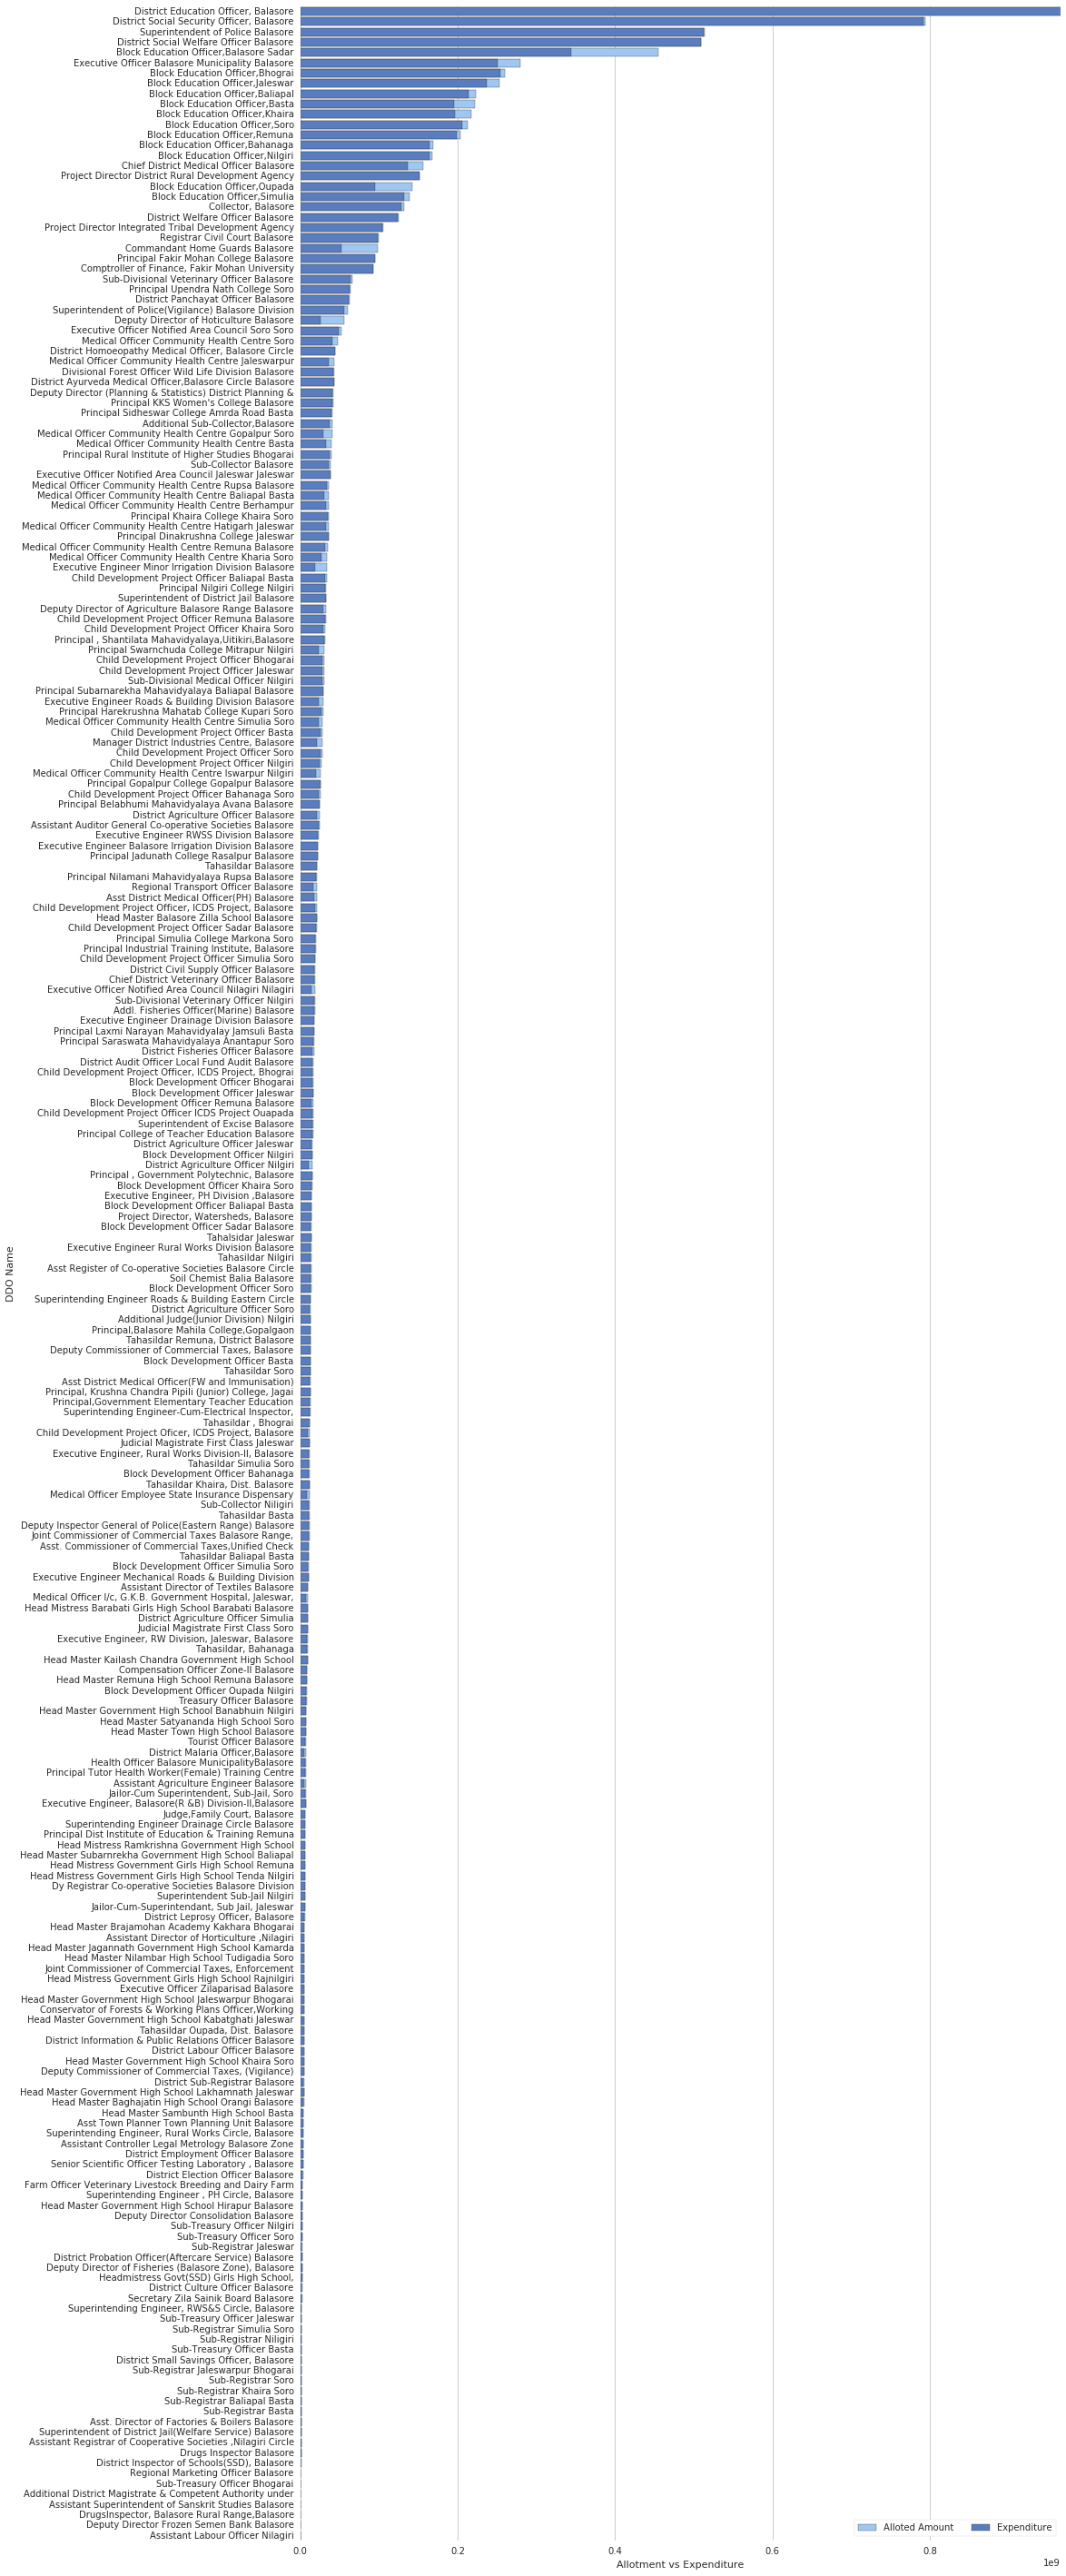

In [81]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 50))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="DDO Name", data=DdoByAllot_df,
            label="Alloted Amount", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="DDO Name", data=DdoByAllot_df,
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 965793191), ylabel="DDO Name",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)

In [82]:
AllotByDate_df = df.groupby(['Allotment Date'])['Alloted Amount', 'Expenditure'].sum()
AllotByDate_df.reset_index(level=0, inplace=True)

AllotByDate_df["Allotment Date(D)"] = pd.to_datetime(AllotByDate_df['Allotment Date'])
AllotByDate_df["Expenditure Percentage"] = ((AllotByDate_df["Expenditure"]/AllotByDate_df["Alloted Amount"] * 100) - 100) * - 1
AllotByDate_df.sort_values("Allotment Date(D)", ascending=True, inplace=True)
#AllotByDate_df["Allotment Date"].dt.date
#AllotByDate_df["Allotment Date"] = str(AllotByDate_df["Allotment Date"])
AllotByDate_df.head()

,Allotment Date,Alloted Amount,Expenditure,Allotment Date(D),Expenditure Percentage
298,31-Mar-16,5828000,5828000,2016-03-31,-0.000000
9,02-Apr-16,92874925,92874483,2016-04-02,0.000476
21,03-Apr-16,1373182,1373182,2016-04-03,-0.000000
32,04-Apr-16,49557172,49442255,2016-04-04,0.231888
42,05-Apr-16,49678746,49228611,2016-04-05,0.906092


/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: usin

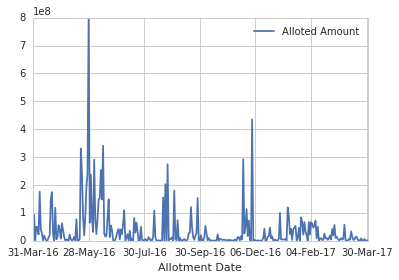

In [83]:
AllotByDate_df[['Allotment Date','Alloted Amount']].set_index('Allotment Date').plot()

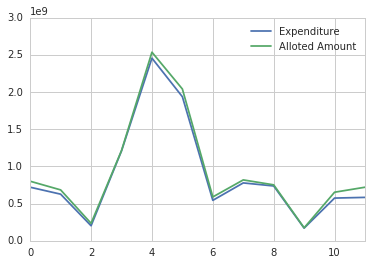

In [84]:
AllotByMonth = AllotByDate_df.groupby(AllotByDate_df["Allotment Date(D)"].dt.month)['Expenditure', "Alloted Amount"].sum()
AllotByMonth.reset_index(level=0, inplace=True)
AllotByMonth.sort_values("Allotment Date(D)", inplace=True)
AllotByMonth[[ "Expenditure", "Alloted Amount"]].plot()


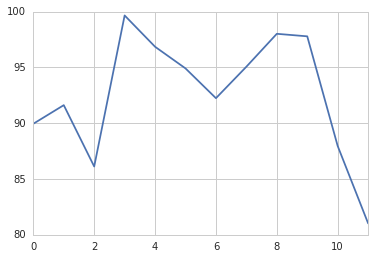

In [94]:
AllotByMonth["Percent"] = AllotByMonth["Expenditure"]/AllotByMonth["Alloted Amount"]*100
AllotByMonth["Percent"].plot()

/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return getitem(key)
/home/akshay/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:2069: VisibleDeprecationWarning: usin

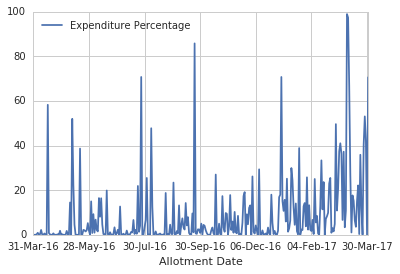

In [85]:



AllotByDate_df[['Allotment Date',"Expenditure Percentage"]].set_index('Allotment Date').plot()

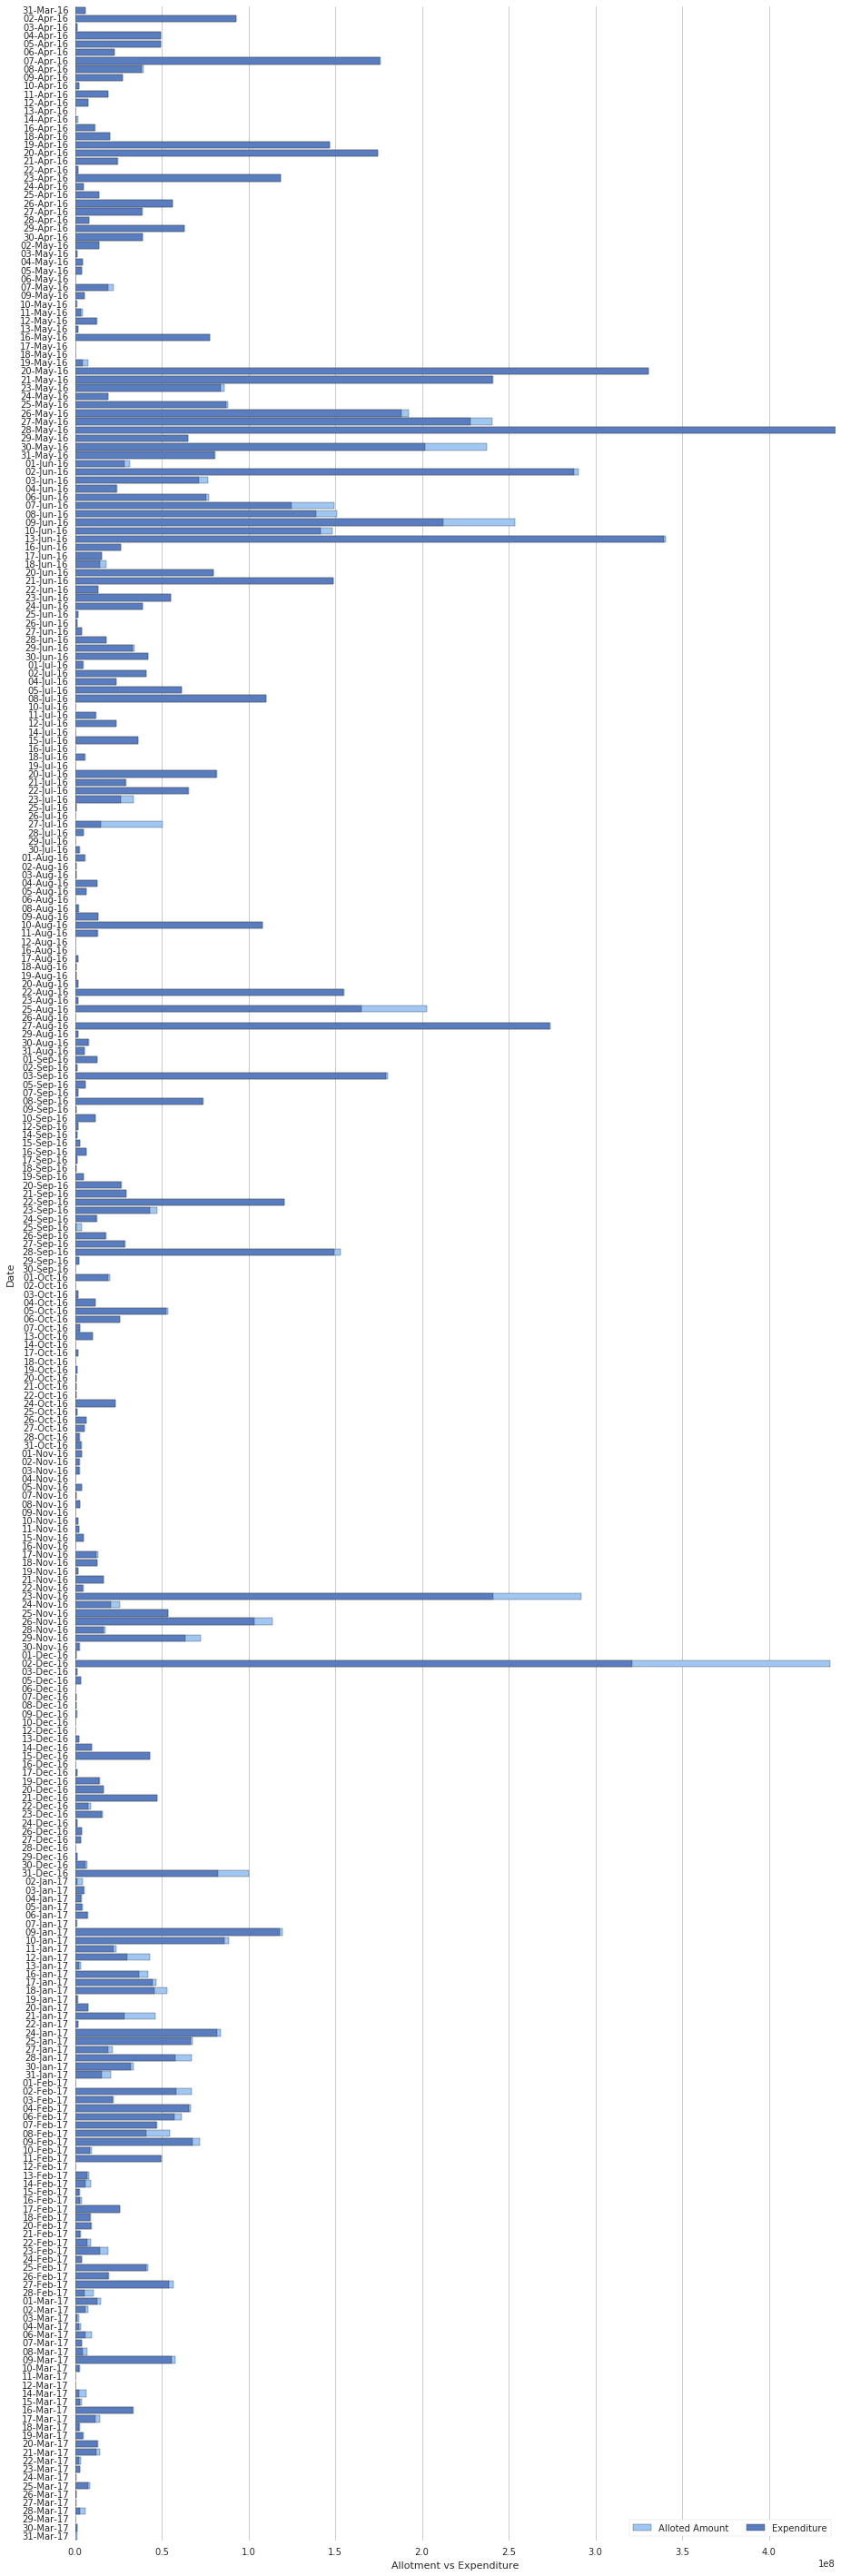

In [86]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 50))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="Allotment Date", data=AllotByDate_df,
            label="Alloted Amount", color="b")

sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="Allotment Date", data=AllotByDate_df,
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 438079286), ylabel="Date",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)

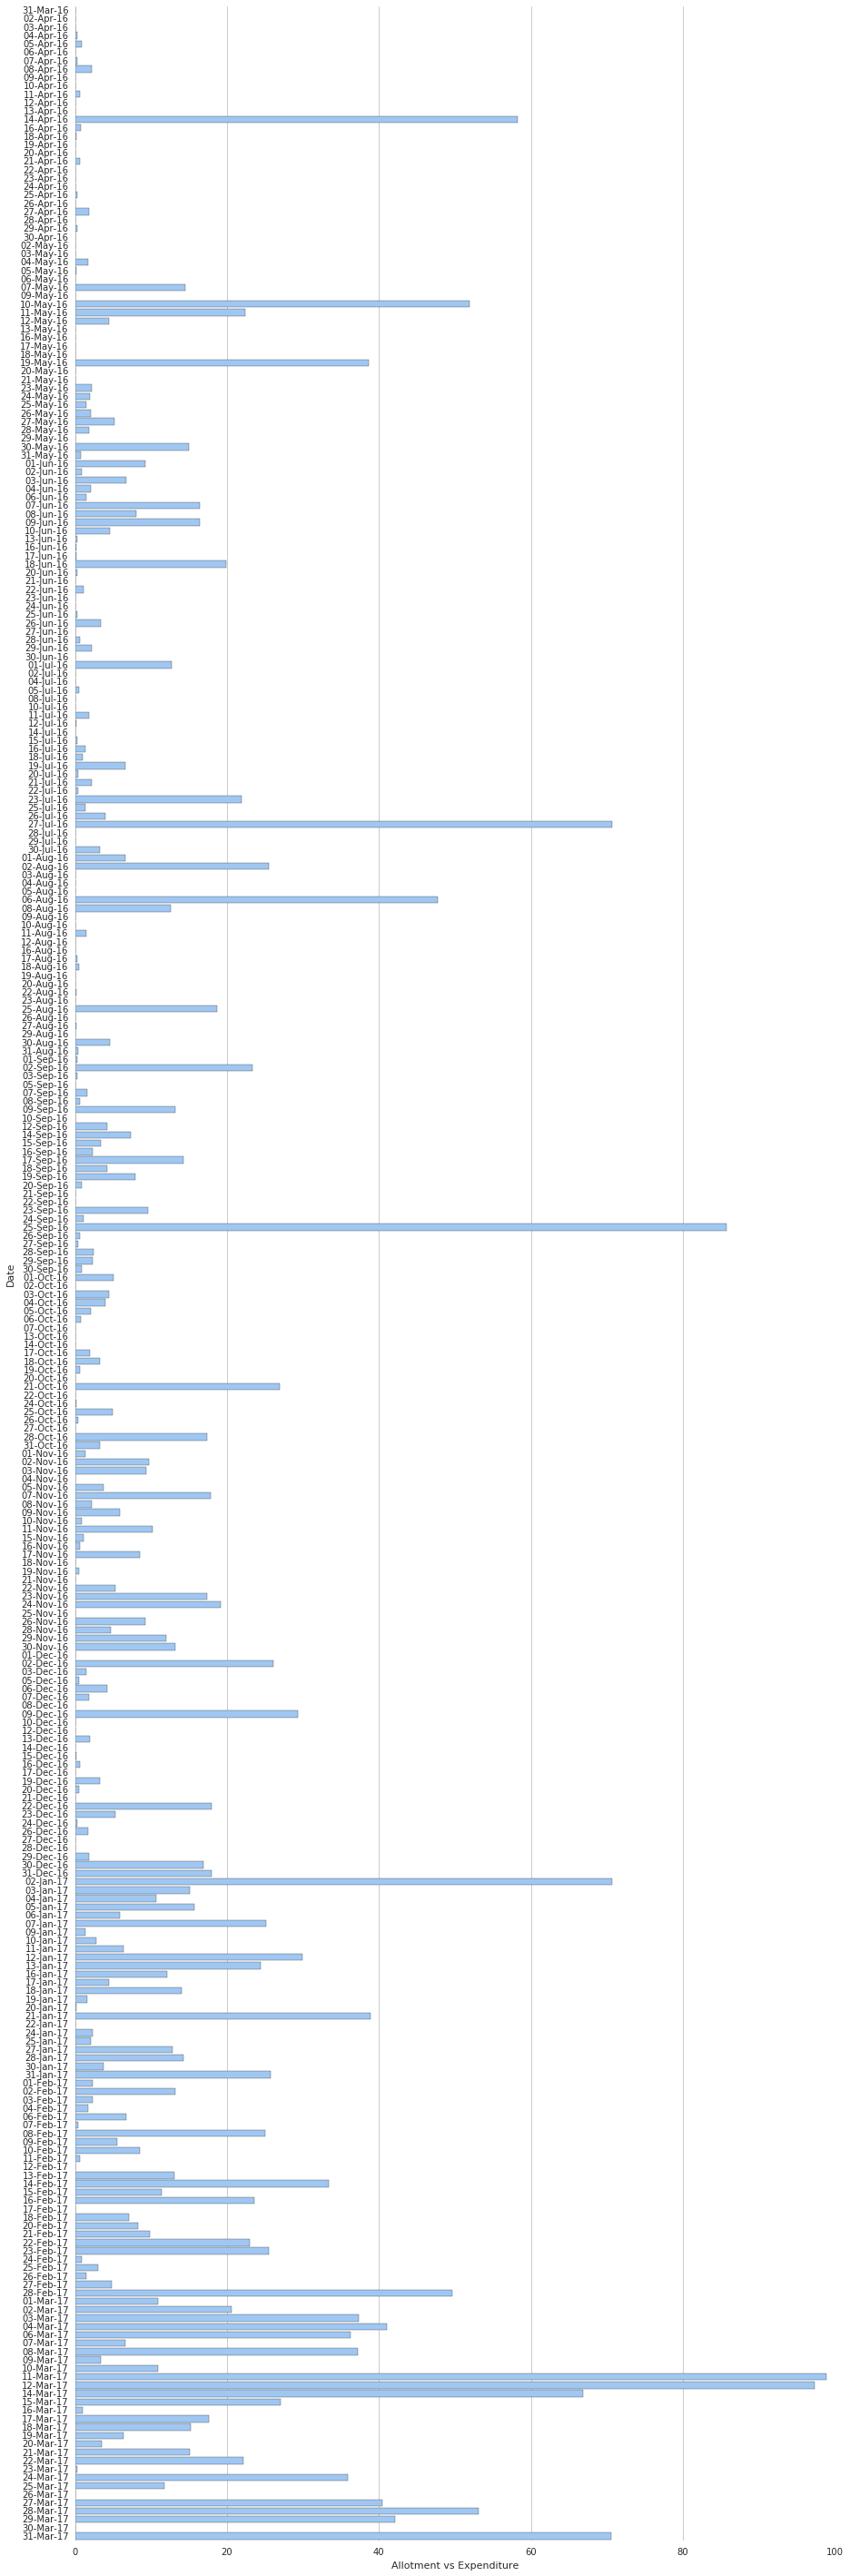

In [87]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 50))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Expenditure Percentage", y="Allotment Date", data=AllotByDate_df,
            label="Alloted Amount", color="b")



# Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100), ylabel="Date",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)

In [88]:
BudgetCode_df = df.groupby(['Budget Code'])['Alloted Amount', 'Expenditure'].sum()
BudgetCode_df.head()

,Alloted Amount,Expenditure
Budget Code,,
01-2014-00-105-1270-01003-136-0-1-0,17958252,17957482
01-2014-00-105-1270-01003-156-0-1-0,13531730,13531730
01-2014-00-105-1270-01003-403-0-1-0,835605,835605
01-2014-00-105-1270-01003-516-0-1-0,25000,24931
01-2014-00-105-1270-01003-523-0-1-0,444250,441250


In [89]:
BudgetCode_df.reset_index(level=0, inplace=True)
BudgetCode_df.sort_values("Alloted Amount", ascending=False, inplace=True)

In [90]:
BudgetCode_df.head()

,Budget Code,Alloted Amount,Expenditure
461,10-2202-02-109-1261-01004-000-1-1-2,1141267383,1137715027
67,01-2055-00-113-1065-01003-136-0-1-0,419566183,419366979
1510,38-2202-03-104-2090-41048-921-0-1-0,394104998,384419843
457,10-2202-02-109-1261-01003-156-0-1-0,376248606,363983384
407,10-2202-01-101-0556-01003-156-0-1-0,272324288,244996262


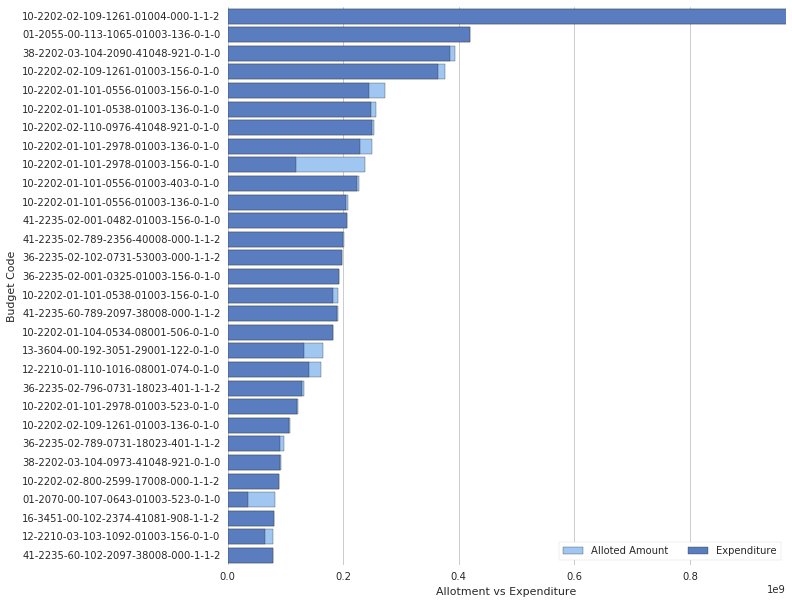

In [91]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))
sns.set(style="whitegrid")

sns.set_color_codes("pastel")
sns.barplot(x="Alloted Amount", y="Budget Code", data=BudgetCode_df[:30],
            label="Alloted Amount", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Expenditure", y="Budget Code", data=BudgetCode_df[:30],
            label="Expenditure", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 965526306), ylabel="Budget Code",
       xlabel="Allotment vs Expenditure")
sns.despine(left=True, bottom=True)